## Exercise: 

"Evaluate the Mann-Whitney U test for DIC and temperatura. Create boxplots and violin plots for these analyses."

> Importamos el DataFrame

In [4]:
import pandas as pd 

# definimos la función para crear el DataFrame
def import_csv(file):
    return pd.read_csv(file)

# creamos la variable de la ubicación del csv
path = "../../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# importamos el archivo
CO2Data = import_csv(path)

print(CO2Data.head())

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7          

> Creamos la función del test U de Mann Whitney 


In [5]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    result = mannwhitneyu(data1, data2, alternative='two-sided')

    print (f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("La diferencia es estadisticamente significativa.")
    else:
        print("La diferencia NO es estadisticamente significativa.")

### **Para los datos de DIC**

Creamos primero el gráfico de cajas con bigotes

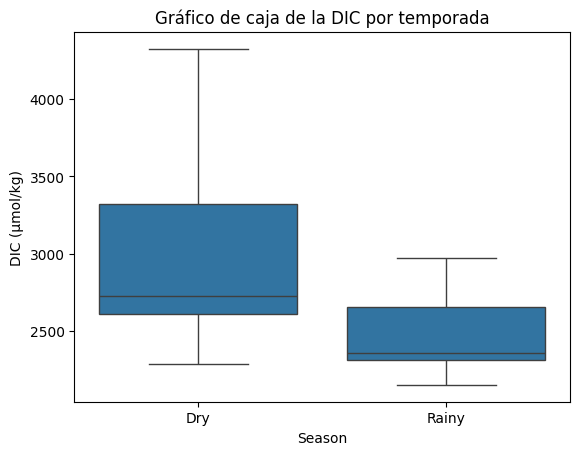

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# creamos un gráfico de caja
sns.boxplot(x='season', y='dic_micromol_kg', data=CO2Data)
#sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color="0.25")

# añadimos etiquetas y titulo
plt.xlabel('Season')
plt.ylabel('DIC (µmol/kg)')
plt.title('Gráfico de caja de la DIC por temporada')

plt.show()

Podemos ver que según el grafico de cajas con bigotes la diferencia entre los datos NO es estadisticamente significativa, sin embargo, se hara la prueba de Mann Whitney

In [15]:
# filtramos los datos de DIC por season
dic_dry = CO2Data.loc[CO2Data["season"] == "Dry", "dic_micromol_kg"]
dic_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "dic_micromol_kg"]

# realizamos la prueba U de Mann Whitney para TA entre las estaciones secas y de lluvia
mann_whitney_test(dic_dry, dic_rainy)

U statistic = 1942.5
p-value = 1.1746695070093671e-06
La diferencia es estadisticamente significativa.


Como lo muestra la consola la diferencia es estadisticamente significativa por lo que la interpretación visual del gráfico de cajas y bigotes no nos da la certeza de significancia estadistica y se debe de comparar con las pruebas estadisticas como en este caso Mann-Whitney

Esto puede deberse a la densidad de puntos en el grafico por lo que creamos el grafico de violin para identificar la densidad.


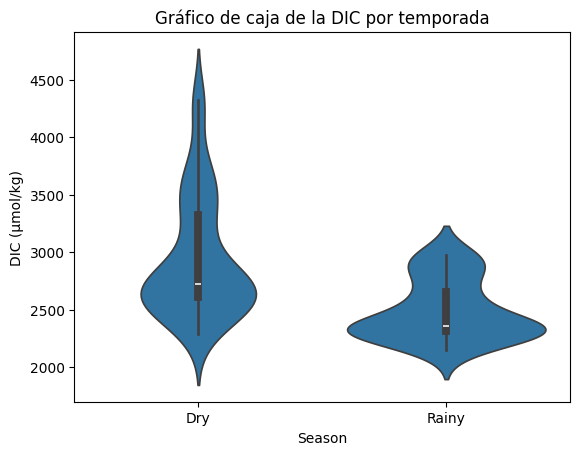

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# creamos un gráfico de caja
sns.violinplot(x='season', y='dic_micromol_kg', data=CO2Data)
#sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color="0.25")

# añadimos etiquetas y titulo
plt.xlabel('Season')
plt.ylabel('DIC (µmol/kg)')
plt.title('Gráfico de caja de la DIC por temporada')

plt.show()

### **Para los datos de temperatura**

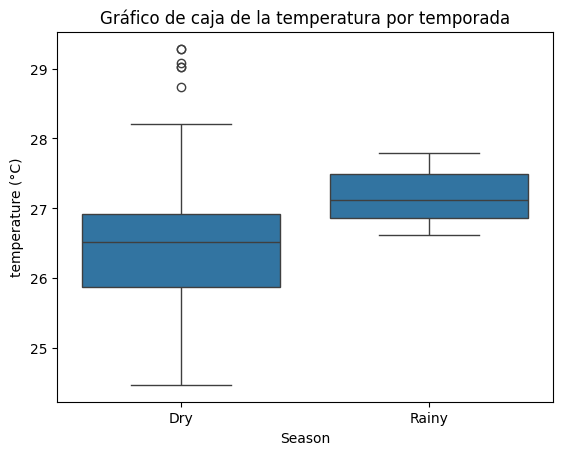

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# creamos un gráfico de caja
sns.boxplot(x='season', y='temp_c', data=CO2Data)
#sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color="0.25")

# añadimos etiquetas y titulo
plt.xlabel('Season')
plt.ylabel('temperature (°C)')
plt.title('Gráfico de caja de la temperatura por temporada')

plt.show()

Según el grafico de cajas con bigotes la diferencia entre los datos NO es estadisticamente significativa, sin embargo, se hara la prueba de Mann Whitney

In [17]:
# filtramos los datos de DIC por season
temp_dry = CO2Data.loc[CO2Data["season"] == "Dry", "temp_c"]
temp_rainy = CO2Data.loc[CO2Data["season"] == "Rainy", "temp_c"]

# realizamos la prueba U de Mann Whitney para TA entre las estaciones secas y de lluvia
mann_whitney_test(temp_dry, temp_rainy)

U statistic = 551.0
p-value = 5.317160670684041e-06
La diferencia es estadisticamente significativa.


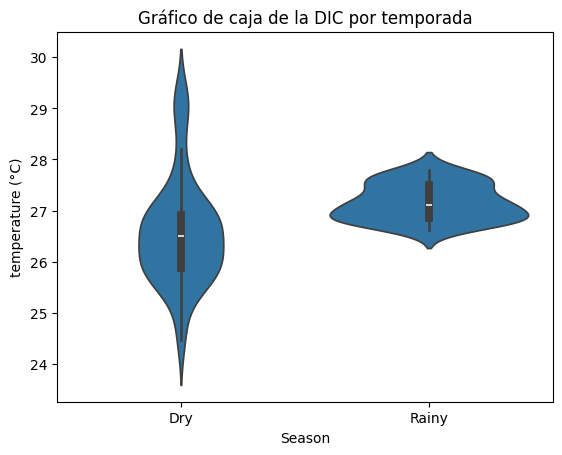

In [18]:
# creamos un gráfico de violin
sns.violinplot(x='season', y='temp_c', data=CO2Data)
#sns.swarmplot(x='season', y='sal_psu', data=CO2Data, color="0.25")

# añadimos etiquetas y titulo
plt.xlabel('Season')
plt.ylabel('temperature (°C)')
plt.title('Gráfico de caja de la DIC por temporada')

plt.show()